Bar id — ID батончика в базе данных
Company (Maker-if known) — название компании, изготовившей батончик.
Specific Bean Origin or Bar Name — точное место происхождения какао-бобов.
Broad Bean Origin — название региона, где были выращены какао-бобы.
Company Location — страна, в которой произведён шоколадный батончик.
Bean Type — вид какао-бобов, используемых в батончике.
REF — числовое значение, показывающее, как давно ревью было добавлено в базу. Чем выше значение, тем более свежее ревью.
Review Date — год публикации рецензии.
Cocoa Percent — процент какао в шоколаде.
Rating — оценка батончика фокус-группой.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
from statsmodels import stats

In [2]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [3]:
df = pd.read_csv('cacao_flavors.csv')
df.tail()

,Bar id,Company \n(Maker-if known),Specific Bean Origin\nor Bar Name,REF,Review\nDate,Cocoa\nPercent,Company\nLocation,Rating,Bean\nType,Broad Bean\nOrigin
1790,1791,Zotter,Peru,647,2011,70%,Austria,3.75,,Peru
1791,1792,Zotter,Congo,749,2011,65%,Austria,3.00,Forastero,Congo
1792,1793,Zotter,Kerala State,749,2011,65%,Austria,3.50,Forastero,India
1793,1794,Zotter,Kerala State,781,2011,62%,Austria,3.25,,India
1794,1795,Zotter,"Brazil, Mitzi Blue",486,2010,65%,Austria,3.00,,Brazil


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1795 entries, 0 to 1794
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Bar id                            1795 non-null   int64  
 1   Company 
(Maker-if known)         1795 non-null   object 
 2   Specific Bean Origin
or Bar Name  1795 non-null   object 
 3   REF                               1795 non-null   int64  
 4   Review
Date                       1795 non-null   int64  
 5   Cocoa
Percent                     1795 non-null   object 
 6   Company
Location                  1795 non-null   object 
 7   Rating                            1795 non-null   float64
 8   Bean
Type                         1794 non-null   object 
 9   Broad Bean
Origin                 1794 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 140.4+ KB


In [7]:
df.isnull().sum()

Bar id                               0
Company \n(Maker-if known)           0
Specific Bean Origin\nor Bar Name    0
REF                                  0
Review\nDate                         0
Cocoa\nPercent                       0
Company\nLocation                    0
Rating                               0
Bean\nType                           1
Broad Bean\nOrigin                   1
dtype: int64

In [224]:
df.describe()

,Bar id,REF,Review\r\nDate,Rating
count,1795.000000,1795.000000,1795.000000,1795.000000
mean,898.000000,1035.904735,2012.325348,3.422981
std,518.316184,552.886365,2.927210,1.750584
min,1.000000,5.000000,2006.000000,1.000000
25%,449.500000,576.000000,2010.000000,3.000000
50%,898.000000,1069.000000,2013.000000,3.250000
75%,1346.500000,1502.000000,2015.000000,3.500000
max,1795.000000,1952.000000,2017.000000,19.750000


In [225]:
df.columns

Index(['Bar id', 'Company \r\n(Maker-if known)',
       'Specific Bean Origin\r\nor Bar Name', 'REF', 'Review\r\nDate',
       'Cocoa\r\nPercent', 'Company\r\nLocation', 'Rating', 'Bean\r\nType',
       'Broad Bean\r\nOrigin'],
      dtype='object')

In [226]:
df.columns=['bar_id', 'company', 'specific_origin', 'ref', 'review_date',
           'cocoa_percent', 'company_location', 'rating', 'bean_type', 'broad_origin']
df.head()

,bar_id,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,1,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,2,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,3,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,4,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,5,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


1795


<AxesSubplot:>

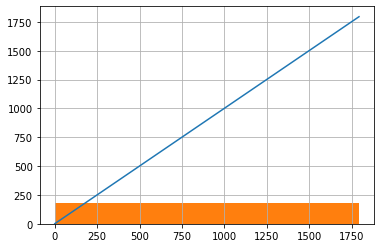

In [227]:
print(df.bar_id.nunique())
plt.plot(df.bar_id)
df.bar_id.hist()

id батончиков все уникальны, упорядочены, задвоениий и пропусков нет, поэтому этот столбец удалим

In [228]:
df.drop(['bar_id'], inplace=True, axis=1)
df.head()

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
0,A. Morin,Agua Grande,1876,2016,63%,France,11.50,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,670%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


# Company

In [229]:
df.company.value_counts()

                       99
Soma                   45
Fresco                 26
Bonnat                 26
Pralus                 25
                       ..
Friis Holm              1
Vintage Plantations     1
Park 75                 1
Hachez                  1
Rancho San Jacinto      1
Name: company, Length: 408, dtype: int64

In [230]:
# заменим пустые строки на None
df.company = df.company.apply(lambda x: None if x.strip()=='' else x)
df.company.value_counts()

Soma                                 45
Fresco                               26
Bonnat                               26
Pralus                               25
Domori                               22
                                     ..
Pura Delizia                          1
Cacao Arabuco                         1
Cacaosuyo (Theobroma Inversiones)     1
Monsieur Truffe                       1
Rancho San Jacinto                    1
Name: company, Length: 407, dtype: int64

In [231]:
display(pd.DataFrame(df.company.value_counts()))
print(f"Количество компаний, у которых более 10 оценок: {(df.company.value_counts()>10).sum()}")

,company
Soma,45
Fresco,26
Bonnat,26
Pralus,25
Domori,22
...,...
Pura Delizia,1
Cacao Arabuco,1
Cacaosuyo (Theobroma Inversiones),1
Monsieur Truffe,1


Количество компаний, у которых более 10 оценок: 30


# specific_origin

In [232]:
df.specific_origin.value_counts()

                                            58
Madagascar                                  55
Peru                                        44
Ecuador                                     39
Dominican Republic                          33
                                            ..
Panama, Raven                                1
Monte Alegre, Diego Badero                   1
Caribe                                       1
Maleku                                       1
Camino Verde P., Balao, Guayas, "Floral"     1
Name: specific_origin, Length: 1013, dtype: int64

In [233]:
# заменим пустые строки на None
df.specific_origin = df.specific_origin.apply(lambda x: None if x.strip()=='' else x)

In [234]:
display(df.specific_origin.value_counts())
print(f"Количество регионов, встретившихся более 10 раз: {(df.specific_origin.value_counts()>10).sum()}")
(df.specific_origin.value_counts()).sum()

Madagascar                                  55
Peru                                        44
Ecuador                                     39
Dominican Republic                          33
Venezuela                                   21
                                            ..
Panama, Raven                                1
Monte Alegre, Diego Badero                   1
Caribe                                       1
Maleku                                       1
Camino Verde P., Balao, Guayas, "Floral"     1
Name: specific_origin, Length: 1012, dtype: int64

Количество регионов, встретившихся более 10 раз: 15


1737

# ref

count    1795.000000
mean     1035.904735
std       552.886365
min         5.000000
25%       576.000000
50%      1069.000000
75%      1502.000000
max      1952.000000
Name: ref, dtype: float64

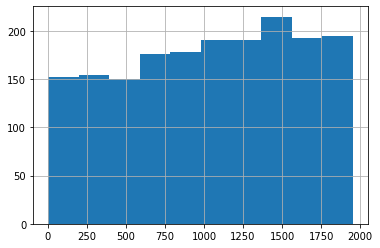

In [235]:
df.ref.hist()
df.ref.describe()

Как видно, у этого признака распределение без аномалий, выбросов нет. Заметен тренд на возрастание количества отзывов со временем (так как REF обозначает время внесения отзыва в базу). Интересно, почему так происходит?

# review_date

count    1795.000000
mean     2012.325348
std         2.927210
min      2006.000000
25%      2010.000000
50%      2013.000000
75%      2015.000000
max      2017.000000
Name: review_date, dtype: float64

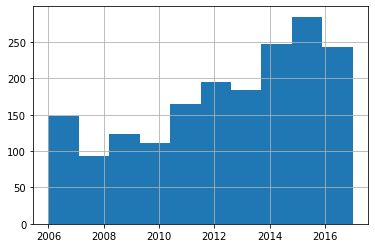

In [236]:
df.review_date.hist()
df.review_date.describe()

Здесь также заметен тренд на увеличение ревью со временем.

# cocoa_percent

In [237]:
df.cocoa_percent.value_counts()

70%      664
75%      219
72%      189
65%       77
80%       70
        ... 
570%       1
668%       1
60.5%      1
576%       1
580%       1
Name: cocoa_percent, Length: 59, dtype: int64

In [238]:
# Значения в столбцах представлены в виде процентов.
# Для дальнейшего анализа будет проще, если они будут представлены числами.
# Трансформируем столбец:
df.cocoa_percent = df.cocoa_percent.apply(lambda x: float(x.replace('%','')))
df.cocoa_percent.value_counts()

70.0     664
75.0     219
72.0     189
65.0      77
80.0      70
        ... 
42.0       1
571.0      1
582.0      1
57.0       1
60.5       1
Name: cocoa_percent, Length: 59, dtype: int64

count    1795.000000
mean       75.932312
std        44.475981
min        42.000000
25%        70.000000
50%        70.000000
75%        75.000000
max       682.000000
Name: cocoa_percent, dtype: float64

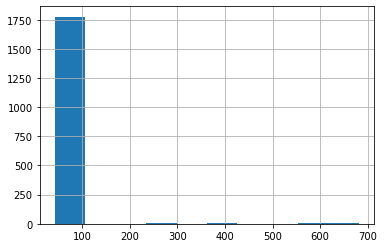

In [239]:
df.cocoa_percent.hist()
df.cocoa_percent.describe()

Очевидно, есть данные, противоречащие здравому смыслу: содержание какао-бобов больше 100%

In [240]:
len(df[df.cocoa_percent>100])

19

In [241]:
Q1 = df.cocoa_percent.quantile(0.25)
Q3 = df.cocoa_percent.quantile(0.75)
IQR = Q3 - Q1
print(Q1,Q3,IQR)

70.0 75.0 5.0


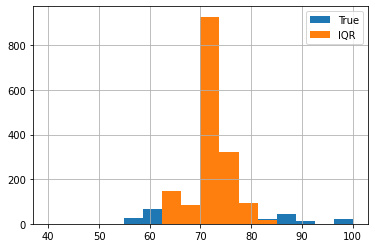

In [242]:
df[df.cocoa_percent<=100].cocoa_percent.hist(bins=16,range=(40,100),label="True")
df[df.cocoa_percent.between(Q1-1.5*IQR, Q3+1.5*IQR)].cocoa_percent.hist(bins=16,range=(40,100),label="IQR")
plt.legend()

Как видно, формула выбросов в нашем случае помечает как выбросы слишком много потенциально реальных значений, поэтому воспользуемся здравым смыслом. Очевидно, что при сборе данных произошла ошибка.
Придется выбросить эти 19 строк.

In [243]:
df=df[df.cocoa_percent<=100]
len(df)

1776

# company_location

In [244]:
display(pd.DataFrame(df.company_location.value_counts()))
print(f"Количество стран с более 10 оценками: {(df.company_location.value_counts()>10).sum()}")
df[df.company_location.str.contains(' ')].company_location

,company_location
U.S.A.,756
France,155
Canada,124
U.K.,94
Italy,63
...,...
Czech Republic,1
Niacragua,1
Russia,1
Philippines,1


Количество стран с более 10 оценками: 22


279           Puerto Rico
345           New Zealand
346           New Zealand
347            Costa Rica
348            Costa Rica
349            Costa Rica
350            Costa Rica
351            Costa Rica
385           South Korea
386           South Korea
434              Sao Tome
435              Sao Tome
436              Sao Tome
437              Sao Tome
521          South Africa
617             St. Lucia
618             St. Lucia
655           Puerto Rico
656           Puerto Rico
807           New Zealand
808           New Zealand
809           New Zealand
810           New Zealand
825          South Africa
879        Czech Republic
883     Domincan Republic
884     Domincan Republic
885     Domincan Republic
886     Domincan Republic
976           Puerto Rico
1160           Costa Rica
1161           Costa Rica
1204          New Zealand
1205          New Zealand
1206          New Zealand
1207          New Zealand
1208          New Zealand
1209          New Zealand
1381        

Стран намного меньше, чем регионов — всего 60. Стран, у которых больше 10 ревью — целых 22. Пустых значений нет (ура!).

# rating

count    1776.000000
mean        3.425816
std         1.759007
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max        19.750000
Name: rating, dtype: float64

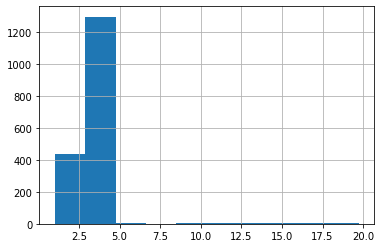

In [245]:
df.rating.hist()
df.rating.describe()

Как мы видим, большинство оценок распределены между 3 и 3.5 (медиана 3.25, 25-й перцентиль 3 и 75-й — 3.5), что позволяет сделать два предположения:

1.Скорее всего была использована пятибалльная шкала оценивания
2.В данных есть выбросы.

In [246]:
df[df.rating>5].sample(20)

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
431,Christopher Morel (Felchlin),"Maranon Canyon, Fortunato No. 4",666,2011,68.0,Canada,15.50,Forastero (Nacional),Peru
153,Bar Au Chocolat,Duarte Province,983,2012,70.0,U.S.A.,10.25,,Dominican Republic
698,Fresco,"Sambirano Valley, #215, MR, MC",688,2011,74.0,U.S.A.,17.25,Trinitario,Madagascar
294,Cacao de Origen,None,1395,2014,70.0,Venezuela,11.50,Trinitario,Venezuela
104,Arete,Lachua,1904,2016,70.0,U.S.A.,18.50,,Guatemala
695,Fresco,"Jamaica, #210, DR, MC",642,2011,70.0,U.S.A.,16.75,Trinitario,Jamaica
1232,Original Beans (Felchlin),"Alto Beni, Wild Harvest, Itenez R. 24hr c.",733,2011,66.0,Switzerland,19.00,,Bolivia
1371,Republica del Cacao (aka Confecta),Los Rios,170,2007,75.0,Ecuador,14.25,Forastero (Arriba),Ecuador
432,Chuao Chocolatier,Choroni,445,2009,61.0,U.S.A.,19.75,Criollo,Venezuela
0,A. Morin,Agua Grande,1876,2016,63.0,France,11.50,,Sao Tome


In [247]:
df[df.rating<5].sample(20)

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1626,TCHO,Chocolatey-beta,199,2008,70.0,U.S.A.,2.50,Forastero,Ghana
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,,Togo
558,Domori,Morogoro,863,2012,70.0,Italy,3.50,,Tanzania
555,Domori,Hacienda Victoria,1672,2015,70.0,Italy,3.75,,Ecuador
1264,Pangea,Matasawalevu,1860,2016,76.0,Spain,3.00,,Fiji
411,Chocolats Privilege,Xoconusco,1219,2014,70.0,Canada,2.50,Criollo,Mexico
1274,Patric,Madagascar,439,2009,67.0,U.S.A.,3.50,Trinitario,Madagascar
798,Heirloom Cacao Preservation (Zokoko),"Alto Beni, Upper Rio Beni, 2015",1744,2016,68.0,U.S.A.,3.75,"Amazon, ICS",Bolivia
439,None,Sambirano,1646,2015,75.0,U.S.A.,3.00,Trinitario,Madagascar
1169,Nathan Miller,Peru,1403,2014,72.0,U.S.A.,2.25,,Peru


In [248]:
df[df.rating==5]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
78,None,Chuao,111,2007,70.0,Italy,5.0,Trinitario,Venezuela
86,Amedei,Toscano Black,40,2006,70.0,Italy,5.0,Blend,


count    38.000000
mean     14.447368
std       3.197950
min      10.000000
25%      11.562500
50%      14.000000
75%      17.250000
max      19.750000
Name: rating, dtype: float64

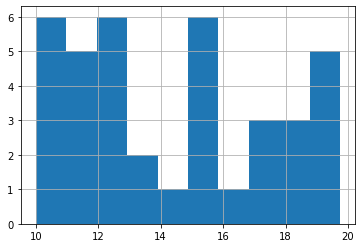

In [249]:
df[df.rating>5].rating.hist()
df[df.rating>5].rating.describe()

count    1738.000000
mean        3.184839
std         0.477883
min         1.000000
25%         2.750000
50%         3.250000
75%         3.500000
max         5.000000
Name: rating, dtype: float64

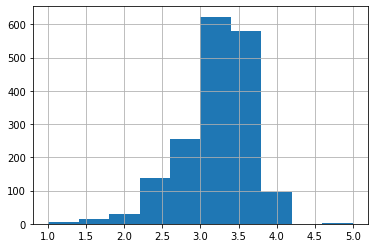

In [250]:
df[df.rating<=5].rating.hist()
df[df.rating<=5].rating.describe()

есть провал в оценочных баллах от 5 до 10. Вероятно сюда попали данные с другой шкалой оценки от 10 до 20. Врядли шкала была от 0 до 20, т.к. отсутствуют оценки в диапазоне (5;10). Благо, их немного, я бы их удалил, но сделаю как в примере, чтобы потом ответить на вопросы.

In [252]:
Q1 = df.rating.quantile(0.25)
Q3 = df.rating.quantile(0.75)
IQR = Q3 - Q1
df = df.loc[df.rating.between(Q1 - 1.5*IQR, Q3 + 1.5*IQR)]
len(df)

1690

# bean_type

In [253]:
df.bean_type.value_counts()

                            829
Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
EET                           3
Beniano                       3
Nacional (Arriba)             3
Matina                        3
Nacional                      2
Criollo, Forastero            2
Criollo (Ocumare 61)          2
Trinitario, Forastero         2
Trinitario (85% Criollo)      2
Amazon, ICS                   2
Amazon mix                    2
Forastero (Catongo)           2
Criollo (Amarru)              2
Forastero, Trinitario         1
Trinitario (Scavina)          1
Blend-Forastero,Criollo       1
Criollo (Ocumare)             1
CCN51                         1
Criollo (Ocumare 67)          1
Criollo,

In [254]:
# сразу заменим пропуски на None
df.bean_type = df.bean_type.astype(str).apply(lambda x: None if x.strip()=='' else x)

In [255]:
display(df.bean_type.value_counts())
df.loc[:,['bean_type']].info()

Trinitario                  401
Criollo                     147
Forastero                    81
Forastero (Nacional)         50
Criollo, Trinitario          37
Blend                        36
Forastero (Arriba)           30
Criollo (Porcelana)          10
Trinitario, Criollo           9
Forastero (Parazinho)         8
Forastero (Arriba) ASS        5
Nacional (Arriba)             3
Beniano                       3
EET                           3
Matina                        3
Trinitario (85% Criollo)      2
Forastero (Catongo)           2
Trinitario, Forastero         2
Criollo, Forastero            2
Amazon mix                    2
Amazon, ICS                   2
Criollo (Ocumare 61)          2
Nacional                      2
Criollo (Amarru)              2
Forastero (Arriba) ASSS       1
Trinitario (Scavina)          1
Criollo (Ocumare 67)          1
CCN51                         1
Criollo (Ocumare)             1
Trinitario (Amelonado)        1
nan                           1
Amazon  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  861 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


In [256]:
df.bean_type = df.bean_type.apply(lambda x: None if pd.isnull(x)
                                            else None if x=='nan'
                                            else x.strip() if '(' not in x
                                            else x[:x.find('(')].strip()
                                 )

In [264]:
display(df.bean_type.value_counts())
print("Значений, встретившихся в столбце более 10 раз:", (df.bean_type.value_counts()>10).sum())
print("Уникальных значений:", df.bean_type.nunique())
pd.DataFrame(df.bean_type).info()

Trinitario                 405
Forastero                  179
Criollo                    165
Criollo, Trinitario         37
Blend                       36
Trinitario, Criollo          9
Nacional                     5
Beniano                      3
EET                          3
Matina                       3
Trinitario, Forastero        2
Criollo, Forastero           2
Amazon mix                   2
Amazon, ICS                  2
CCN51                        1
Trinitario, TCGA             1
Amazon                       1
Trinitario, Nacional         1
Forastero, Trinitario        1
Criollo, +                   1
Blend-Forastero,Criollo      1
Name: bean_type, dtype: int64

Значений, встретившихся в столбце более 10 раз: 5
Уникальных значений: 21
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   bean_type  860 non-null    object
dtypes: object(1)
memory usage: 26.4+ KB


# broad_origin

In [258]:
df.broad_origin.value_counts()

Venezuela                    202
Ecuador                      179
Peru                         159
Madagascar                   138
Dominican Republic           135
                            ... 
Africa, Carribean, C. Am.      1
Peru, Dom. Rep                 1
Ecuador, Costa Rica            1
Ecuador, Mad., PNG             1
Ven., Trinidad, Mad.           1
Name: broad_origin, Length: 97, dtype: int64

In [265]:
df.broad_origin = df.broad_origin.apply(lambda x: None if pd.isnull(x)
                                            else None if x=='nan'
                                            else None if x.strip()==''
                                            else x.strip()
                                       )

In [266]:
display(df.broad_origin.value_counts())
print("Значений, встретившихся в столбце более 10 раз:", (df.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", df.broad_origin.nunique())
pd.DataFrame(df.broad_origin).info()

Venezuela             202
Ecuador               179
Peru                  159
Madagascar            138
Dominican Republic    135
                     ... 
Burma                   1
Peru, Ecuador           1
Ecuador, Mad., PNG      1
Nigeria                 1
Trinidad, Ecuador       1
Name: broad_origin, Length: 96, dtype: int64

Значений, встретившихся в столбце более 10 раз: 25
Уникальных значений: 96
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


In [267]:
def fix_countries(x):
    if pd.isnull(x):
        return x
    if x == 'nan':
        return None
    x = x.replace(' ', '')
    x = x.replace('/', ',') # Venezuela/ Ghana
    x = x.replace('&', ',')
    if '(' in x:
        x = x[:x.find('(')] #Peru(SMartin,Pangoa,nacional)
    x = x.replace('Guat.', 'Guatemala')
    
    if 'Ven' in x and 'Venezuela' not in x:
        x = x.replace('Venez', 'Venezuela') #Venez,Africa,Brasil,Peru,Mex
        x = x.replace('Ven,', 'Venezuela,') #Ven, Trinidad, Ecuador
        x = x.replace('Ven.', 'Venezuela') #Ven., Trinidad, Mad.
        if 'Ven' in x and 'Venezuela' not in x:
            x = x.replace('Ven', 'Venezuela')
        
    x = x.replace('Dom.Rep.', 'DomincanRepublic')
    x = x.replace('DR', 'DomincanRepublic')
    x = x.replace('Dom.Rep', 'DomincanRepublic')
    x = x.replace('D.R.', 'DomincanRepublic')
    x = x.replace('DominicanRep.', 'DomincanRepublic')
    x = x.replace('Domin.Rep', 'DomincanRepublic')
    x = x.replace('Domin.Re', 'DomincanRepublic')
    
    if 'Jam' in x and 'Jamaica' not in x:
        x = x.replace('Jam', 'Jamaica')
        
    if 'Mad.' in x and 'Madagascar' not in x:
        x = x.replace('Mad.', 'Madagascar')
    elif 'Mad' in x and 'Madagascar' not in x:
        x = x.replace('Mad', 'Madagascar')
    elif 'Ma' in x and 'Madagascar' not in x:
        x = x.replace('Ma', 'Madagascar')
        
    if 'Hait' in x and 'Haiti' not in x:
        x = x.replace('Hait', 'Haiti')
        
    if 'Per' in x and 'Peru'  not in x:
        x = x.replace('Per', 'Peru')
    
    x = x.replace('Nic.', 'Nicaragua')

    x = x.replace('Gre.', 'Grenada')
    
    x = x.replace('PNG', 'PapuaNewGuinea')
    
    if 'Mex' in x and 'Mexico' not in x:
        x = x.replace('Mex', 'Mexico')
        
    x = x.replace('Haw.', 'Hawaii')
    
    x = x.replace('Ecuad.', 'Ecuador')
    x = x.replace('Ecu.', 'Ecuador')
    
    return x

In [268]:
df.broad_origin = df.broad_origin.apply(fix_countries)

In [269]:
display(pd.DataFrame(df.broad_origin.value_counts()))
print('Значений, упомянутых более 10 раз:', (df.broad_origin.value_counts()>10).sum())
print("Уникальных значений:", df.broad_origin.nunique())
df.loc[:, ['broad_origin']].info()

,broad_origin
Venezuela,202
Ecuador,179
Peru,160
Madagascar,138
DominicanRepublic,135
...,...
"Ecuador,CostaRica",1
"PapuaNewGuinea,Vanuatu,Madagascar",1
"SouthAmerica,Africa",1
"Africa,Carribean,C.Am.",1


Значений, упомянутых более 10 раз: 25
Уникальных значений: 93
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1690 entries, 1 to 1794
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   broad_origin  1630 non-null   object
dtypes: object(1)
memory usage: 26.4+ KB


#### Выясним, какие столбцы коррелируют с оценкой шоколадных батончиков. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

#### Корреляции рассмотрим только для числовых столбцов.

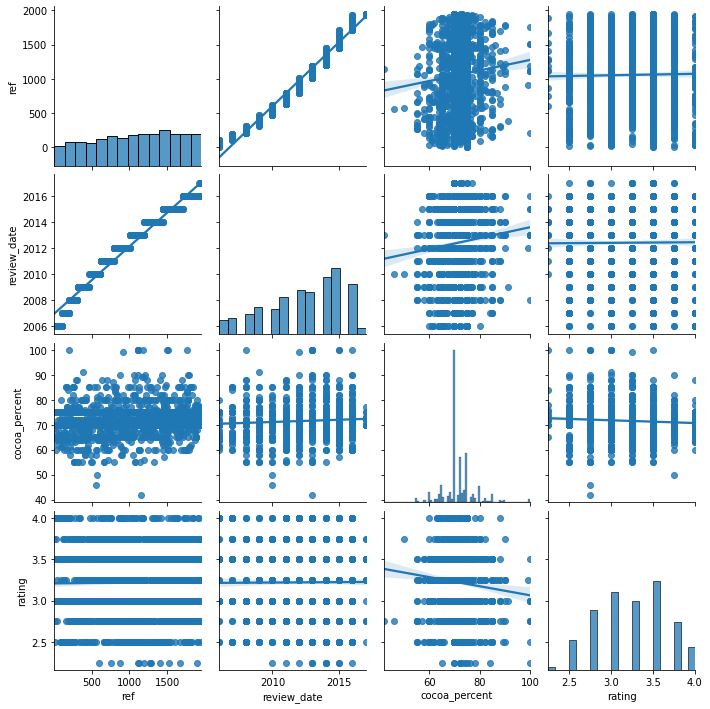

In [275]:
sns.pairplot(df, kind='reg')

In [276]:
df.corr()

,ref,review_date,cocoa_percent,rating
ref,1.000000,0.984913,0.083765,0.016189
review_date,0.984913,1.000000,0.086523,0.006703
cocoa_percent,0.083765,0.086523,1.000000,-0.078156
rating,0.016189,0.006703,-0.078156,1.000000


Так как переменные review_date и ref скоррелированы почти полностью, одну переменную можно исключить. Пусть это будет переменная REF.

Останутся две слабоскоррелированные с рейтингом переменные: cocoa_percent и review_date.

Интересно, что положительная корреляция параметра review_date и rating может говорить как о том, что со временем батончики действительно становятся лучше, так и о том, что рейтинги просто завышаются.

Очевидно, что для номинативных переменных использовать корреляционный анализ не получится. Однако можно посмотреть, различаются ли распределения рейтинга в зависимости от значения этих переменных. Это можно сделать, например, с помощью box-plot или KDE-plot (график показывает плотность распределения переменных).

Номинативные переменные, которые осталось рассмотреть: company, specific_origin, company_location, bean_type, broad_origin.

Так как уникальных значений в столбцах достаточно много, будем брать в рассмотрение по, например, 10 самых частотных.

In [283]:
df[df.company.isin(df.company.value_counts().index[:10])]

,company,specific_origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_origin
1,A. Morin,Kpime,1676,2015,70.0,France,2.75,None,Togo
3,A. Morin,Akata,1680,2015,70.0,France,3.50,None,Togo
4,A. Morin,Quilla,1704,2015,70.0,France,3.50,None,Peru
5,A. Morin,Carenero,1315,2014,70.0,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315,2014,70.0,France,3.50,None,Cuba
...,...,...,...,...,...,...,...,...,...
1698,Valrhona,Caraibe,63,2006,66.0,France,3.00,Trinitario,Carribean
1699,Valrhona,Guanaja,63,2006,70.0,France,4.00,"Criollo, Trinitario",SouthAmerica
1700,Valrhona,Gran Couva 2005 P.,75,2006,64.0,France,2.50,Trinitario,Trinidad
1701,Valrhona,"Porcelana, Maracaibo, Palmira P. 2005",75,2006,64.0,France,3.00,Criollo,Venezuela


In [286]:
df.company.value_counts().index[-3:]

Index(['Ah Cacao', 'Malagasy (Chocolaterie Robert)', 'Rancho San Jacinto'], dtype='object')

In [288]:
df.company.value_counts().index[:3]

Index(['Soma', 'Bonnat', 'Fresco'], dtype='object')

In [287]:
df.company.value_counts()

Soma                                 45
Bonnat                               24
Fresco                               24
Pralus                               23
Domori                               22
                                     ..
Black River (A. Morin)                1
Cacaosuyo (Theobroma Inversiones)     1
Ah Cacao                              1
Malagasy (Chocolaterie Robert)        1
Rancho San Jacinto                    1
Name: company, Length: 395, dtype: int64

In [298]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14,4))
    sns.boxplot(x=column,y='rating',
               data=df[df.loc[:,column].isin(df.loc[:,column].value_counts().index[:10])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+column)
    plt.show()    

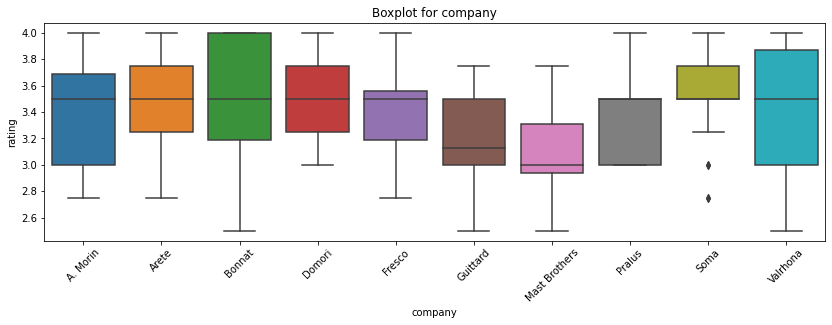

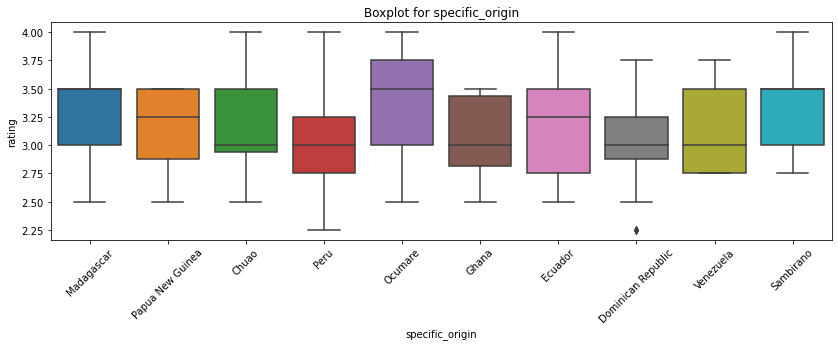

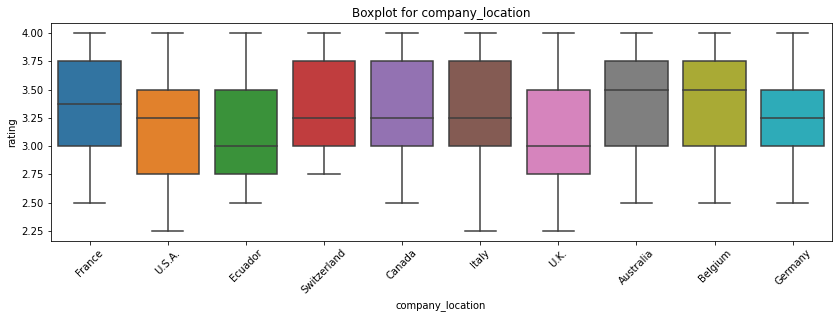

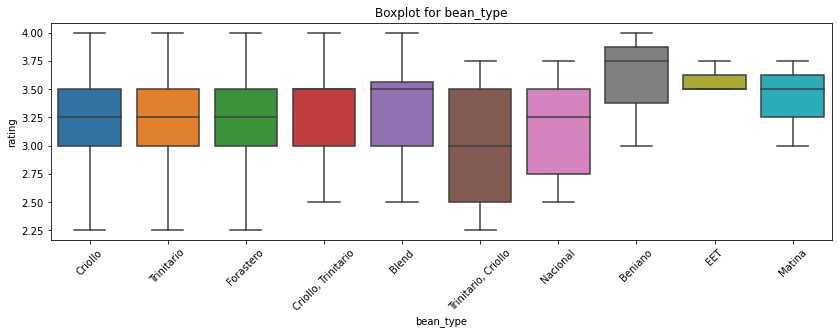

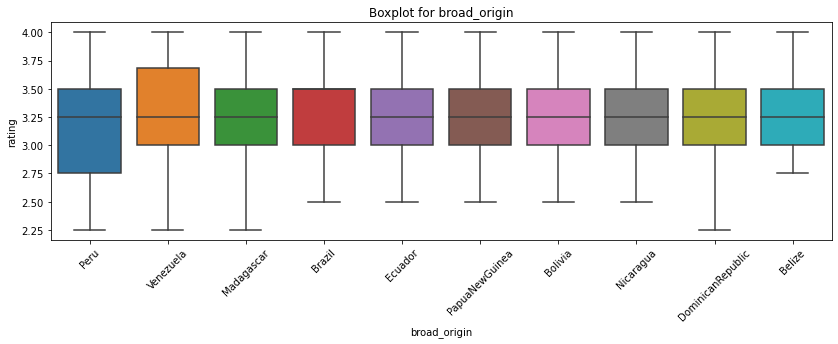

In [299]:
for col in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_boxplot(col)

По графикам похоже, что все параметры, кроме broad_origin, могут влиять на оценку батончика. Однако графики являются лишь вспомогательным инструментом, настоящую значимость различий может помочь распознать статистика. Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [332]:
def get_stat_dif(column):
    '''Функция проверяет, есть ли статистическая разница в распределении оценок батончиков
    по номинативному признаку из столбца column с помощью теста Стьюдента'''
    cols = df.loc[:, column].value_counts().index[:10] # 10 самых частотных уникальных значений признака
    combinations_all = list(combinations(cols, 2)) # список с неповторяющимися парами
    alpha = 0.05/len(combinations_all) # уровень значимости 5% с учетом поправки Бонферони
    for comb in combinations_all:
        if ttest_ind(df[df.loc[:,column] == comb[0]].rating,
                     df[df.loc[:,column] == comb[1]].rating).pvalue<=alpha:
            print('Найдены статистически значимые различия для колонки', column)
            break

In [333]:
for column in ['company', 'specific_origin', 'company_location', 'bean_type', 'broad_origin']:
    get_stat_dif(column)

Найдены статистически значимые различия для колонки company
Найдены статистически значимые различия для колонки specific_origin
Найдены статистически значимые различия для колонки company_location


Как мы видим, серьёзно отличаются три параметра: company,  specific_origin и  company_location. Оставим эти переменные в датасете для дальнейшего построения модели. Итак, в нашем случае важные переменные, которые, возможно, оказывают влияние на оценку, это: company, specific_origin, company_location, review_date, cocoa_percent.

In [334]:
df_for_model = df.loc[:,['company', 'specific_origin', 'company_location', 'review_date', 'cocoa_percent']]
df_for_model.head()

,company,specific_origin,company_location,review_date,cocoa_percent
1,A. Morin,Kpime,France,2015,70.0
3,A. Morin,Akata,France,2015,70.0
4,A. Morin,Quilla,France,2015,70.0
5,A. Morin,Carenero,France,2014,70.0
6,A. Morin,Cuba,France,2014,70.0


Итак, в результате EDA для анализа влияния параметров шоколада на экспертную оценку шоколадных батончиков были получены следующие выводы:

В данных достаточно мало пустых значений, только столбец bean_type был заполнен в малом количестве случаев.
Выбросы найдены только в столбцах с рейтингом и содержанием какао в шоколаде батончиков, что позволяет сделать вывод о том, что данные достаточно чистые.
Положительная корреляция параметра review_date и rating может говорить о том, что с годами рейтинги потихоньку завышаются, либо батончики становятся лучше.
Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели, это company, specific_origin, company_location, review_date и cocoa_percent.